# Example Notebook

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Load node data 

In [363]:
import pandas as pd
country = 'Canada'
nodes = pd.read_csv('./Countries/%s/Nodes/highvoltage_vertices.csv'%country, delimiter='#')

In [364]:
nodes.columns

Index([u'v_id', u'lon', u'lat', u'typ', u'voltage', u'frequency', u'name',
       u'operator', u'ref', u'source', u'n_gen', u'capacity', u'net_capacity',
       u'wkt_srid_4326'],
      dtype='object')

In [365]:
nodes.columns = [ c.replace('_','') for c in nodes.columns ]

In [366]:
nodes.head(3)

,vid,lon,lat,typ,voltage,frequency,name,operator,ref,source,ngen,capacity,netcapacity,wktsrid4326
0,972,-123.402869,48.879374,sub_station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRID=4326;POINT(-123.402868645084 48.879374260...
1,96,-79.311627,43.722880,substation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRID=4326;POINT(-79.3116274345506 43.722880132...
2,247,-79.389392,43.790720,substation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRID=4326;POINT(-79.3893922530771 43.790719778...


In [367]:
np.unique(nodes['typ'].values)

array(['joint', 'merge', 'plant', 'station', 'sub_station', 'substation'], dtype=object)

### Load edge data

In [368]:
edges = pd.read_csv('./Countries/%s/Edges/highvoltage_links.csv'%country, delimiter='#')

In [369]:
edges.columns

Index([u'l_id', u'v_id_1', u'v_id_2', u'voltage', u'cables', u'wires',
       u'frequency', u'name', u'operator', u'ref', u'length_m', u'r_ohmkm',
       u'x_ohmkm', u'c_nfkm', u'i_th_max_a', u'from_relation',
       u'wkt_srid_4326', u'type'],
      dtype='object')

In [370]:
edges.columns = [ c.replace('_','') for c in edges.columns ]

In [371]:
edges.head(3)

,lid,vid1,vid2,voltage,cables,wires,frequency,name,operator,ref,lengthm,rohmkm,xohmkm,cnfkm,ithmaxa,fromrelation,wktsrid4326,type
0,7410,2764,3162,735000,NaN,NaN,NaN,HQ 7056,NaN,HQ 7056,1387.714341,NaN,NaN,NaN,NaN,'',SRID=4326;LINESTRING(-73.4668490178911 53.8725...,line
1,7411,2764,3162,735000,NaN,NaN,NaN,HQ 7054,NaN,HQ 7054,1632.154607,NaN,NaN,NaN,NaN,'',SRID=4326;LINESTRING(-73.4668490178911 53.8725...,line
2,2364,1754,2638,315000,NaN,NaN,NaN,3019-3098,Hydro-Québec,3019,14352.508449,NaN,NaN,NaN,NaN,'',SRID=4326;LINESTRING(-73.3653651236545 45.6008...,line


### Create a graph

In [372]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([int(i) for i in nodes['vid']])
for col in nodes.columns:
    if col != 'vid':
        nx.set_node_attributes(G, col, {k:str(v) for k,v in zip( nodes['vid'], 
                                                                 nodes[col])})

In [149]:
G.node[727]

{'capacity': 'nan',
 'frequency': 'nan',
 'lat': '50.21000097',
 'lon': '5.55002056986',
 'name': 'Marcourt',
 'ngen': 'nan',
 'operator': 'nan',
 'ref': 'nan',
 'source': 'nan',
 'typ': 'sub_station',
 'voltage': 'nan',
 'wktsrid4326': 'SRID=4326;POINT(5.55002056985757 50.2100009699801)'}

In [373]:
G.add_edges_from([(int(n1),int(n2)) for n1,n2 in zip(edges['vid1'].values, 
                                                     edges['vid2'].values)])
for col in edges.columns:
    if 'vid' not in col:
        nx.set_edge_attributes(G, col, {(int(a),int(b)):str(v) for a,b,v in zip(edges['vid1'], 
                                                                                edges['vid2'],
                                                                                edges[col])})

In [132]:
G.edge[1778][1252]

{'cables': '6',
 'cnfkm': 'nan',
 'frequency': 'nan',
 'fromrelation': "''",
 'ithmaxa': 'nan',
 'lengthm': '17589.9636744',
 'lid': '218',
 'name': 'Ebenfurth - Wien S\xc3\xbcdost;Ebreichsdorf - Wien S\xc3\xbcdost',
 'operator': 'Austrian Power Grid AG',
 'ref': '124/1;124/2B',
 'rohmkm': 'nan',
 'type': 'line',
 'voltage': '110000',
 'wires': '1',
 'wktsrid4326': 'SRID=4326;LINESTRING(16.3747756172182 47.9724185206648,16.4198067864732 48.1238856790383)',
 'xohmkm': 'nan'}

In [374]:
print 'G contains %d nodes and %d edges'%(G.number_of_nodes(),G.number_of_edges())

G contains 776 nodes and 942 edges


### Plot the graph

In [375]:
def get_longitude( node ):
    return nodes.ix[ nodes['vid'] == node, 'lon'].values[0]
def get_latitude( node ):
    return nodes.ix[ nodes['vid'] == node, 'lat'].values[0]

In [361]:
def get_bb(country):
    try:
        with open('./Bounding_Boxes.txt', 'r') as f:
            bb = map(int, filter(lambda x:country in x, f.readlines())[0].split(';')[1:])
        return bb
    except:
        print 'error while loading bounding box coordinates'
        return None

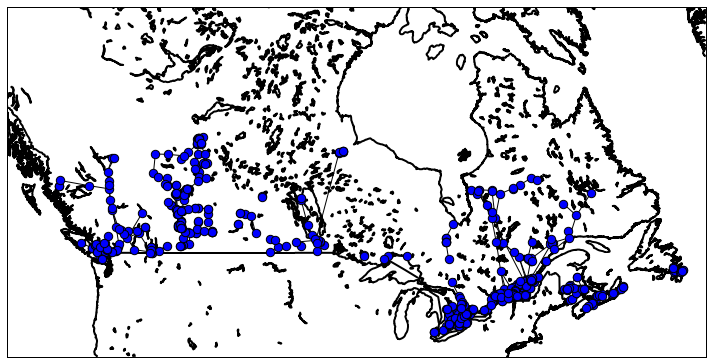

In [383]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)

#Bounding box
#x1, x2, y1, y2 = get_bb(country)

x1 = -135.
x2 = -50.
y1 = 40.
y2 = 65.


m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=20)
m.drawcountries(linewidth=2)
m.drawcoastlines(linewidth=2)

pos = dict((int(node), m(get_longitude( int(node) ), get_latitude( int(node) )) ) for node in G.nodes())

nx.draw_networkx_nodes(G, pos, node_size = 70, node_color = 'b')
nx.draw_networkx_edges( G, pos)
plt.tight_layout()
plt.savefig('./Countries/%s/PNG/%s_highvoltage.png'%(country,country))
plt.show()

### Save the graph

In [384]:
nx.write_gml(G,'./Countries/%s/gml/%s_highvoltage.gml'%(country,country))